In [2]:
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_text_splitters import TokenTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_core.runnables import chain
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate ,MessagesPlaceholder
from langchain_classic.memory import ConversationBufferWindowMemory

In [ ]:
pdf_paths=['./data/rag1.pdf', './data/rag2.pdf' ,'./data/rag3.pdf']
all_docs=[]

for path in pdf_paths:
    loader=PyPDFLoader(path)
    docs =loader.load()
    all_docs.extend(docs)
    
recur_splitter=RecursiveCharacterTextSplitter(chunk_size=1000 ,chunk_overlap=200)
splits=recur_splitter.split_documents(all_docs)

token_splitter=TokenTextSplitter(chunk_size=1000, chunk_overlap=200 ,model_name='gpt-4o-mini')
token_splits=token_splitter.split_documents(all_docs)



model=OpenAIEmbeddings(model='text-embedding-3-small')
recur_embeddings=model.embed_documents([doc.page_content for doc in splits])
token_embeddings=model.embed_documents([doc.page_content for doc in token_splits])

print('Recursive splitter created')
print(f'number of splits: {len(splits)}')
print('Token-based splitter created')
print(f'number of token-based splits: {len(token_splits)}')

Recursive splitter created
number of splits: 181
Token-based splitter created
number of token-based splits: 76


In [3]:
from langchain_community.vectorstores import Chroma,FAISS
import shutil, os

if os.path.exists("./chroma_recur_db"):
    shutil.rmtree("./chroma_recur_db")
    
model=OpenAIEmbeddings(model='text-embedding-3-small')
chroma_db=Chroma.from_documents(
    documents=token_splits,
    embedding=model,
    collection_name='recur_chunks_collection',
    persist_directory='./chroma_recur_db'
)

In [4]:
results=chroma_db.similarity_search('RAG의 장점' ,k=4)

for i,doc in enumerate(results ,1):
    print(f'---- Result {i} ----')
    print(doc.page_content)
    print()

---- Result 1 ----
정천수
102 지식경영연구 제25권 제3호
을 거처 벡터 저장소에 저장된다(Microsoft, 2023). 이러
한 RAG모델 기반 생성형 AI 서비스 구현 흐름은 <그림 
1>과 같다(정천수, 2023d).
2.1.2. RAG기반 Vector Store 유형
RAG시스템을 구축하기 위해서는 지식이 저장되는 벡
터 데이터베이스를 사용하게 되는데, 벡터 데이터베이스
에 대한 일반적인 벡터 파이프라인은 인덱싱(Indexing), 
조회(Querying), 사후처리(Post Processing)와 같은 3단계
를 거친다(Devtorium, 2023). 특히, RAG기반 벡터 저장소
(Vector Store) 저장 유형은 <그림 2>와 같이 모든 소스 
데이터를 사전에 Vector Store에 저장하는 경우와 질문 
시 실시간으로 넣는 경우로 나눌 수 있다(정천수, 2023d).
기업에서는 내부 지식을 Open LLM을 통해 서비스하
게 되었을 때 보안 이슈 때문에 Local LLM을 사용하는 
것이 중요한 이슈이다(정천수, 2023d). 이때 각 구간별로 
가장 잘 처리할 수 있는 Local LLM을 여러 개 구성하여 
사용하는 것이 효과적인데, <그림 2>에서 여러 개의 소
<그림 1> RAG기반 생성형 AI 서비스 구현 흐름
<그림 2> RAG기반 Vector Store 구성 유형 및 처리절차

---- Result 2 ----
정천수
104 지식경영연구 제25권 제3호
LangChain 또는 LlamaIndex 프레임워크는 이러한 전략
을 구현할 수 있도록 각 항목별 라이브러리를 제공하고 
있어 구현을 좀더 쉽게 할 수 있도록 하고 있다
.
2.2.2. Advanced RAG 유형 연구 및 개선 방향
현재 연구되고 있는 대표적인 Advanced RAG 방안을 
살펴보고, 각 유형의 강점과 약점을 분석하여 본 연구의 
방향성을 제시하고자 한다. 
• Self-RAG: 이 방식은 생성된 답변을 다시 검색하여 
관련 정보를 찾고, 

In [5]:
results=chroma_db.similarity_search('기존 RAG방식의 한계' ,k=4)

for i,doc in enumerate(results ,1):
    print(f'---- Result {i} ----')
    print(doc.page_content)
    print()

---- Result 1 ----
정천수
102 지식경영연구 제25권 제3호
을 거처 벡터 저장소에 저장된다(Microsoft, 2023). 이러
한 RAG모델 기반 생성형 AI 서비스 구현 흐름은 <그림 
1>과 같다(정천수, 2023d).
2.1.2. RAG기반 Vector Store 유형
RAG시스템을 구축하기 위해서는 지식이 저장되는 벡
터 데이터베이스를 사용하게 되는데, 벡터 데이터베이스
에 대한 일반적인 벡터 파이프라인은 인덱싱(Indexing), 
조회(Querying), 사후처리(Post Processing)와 같은 3단계
를 거친다(Devtorium, 2023). 특히, RAG기반 벡터 저장소
(Vector Store) 저장 유형은 <그림 2>와 같이 모든 소스 
데이터를 사전에 Vector Store에 저장하는 경우와 질문 
시 실시간으로 넣는 경우로 나눌 수 있다(정천수, 2023d).
기업에서는 내부 지식을 Open LLM을 통해 서비스하
게 되었을 때 보안 이슈 때문에 Local LLM을 사용하는 
것이 중요한 이슈이다(정천수, 2023d). 이때 각 구간별로 
가장 잘 처리할 수 있는 Local LLM을 여러 개 구성하여 
사용하는 것이 효과적인데, <그림 2>에서 여러 개의 소
<그림 1> RAG기반 생성형 AI 서비스 구현 흐름
<그림 2> RAG기반 Vector Store 구성 유형 및 처리절차

---- Result 2 ----
정천수
104 지식경영연구 제25권 제3호
LangChain 또는 LlamaIndex 프레임워크는 이러한 전략
을 구현할 수 있도록 각 항목별 라이브러리를 제공하고 
있어 구현을 좀더 쉽게 할 수 있도록 하고 있다
.
2.2.2. Advanced RAG 유형 연구 및 개선 방향
현재 연구되고 있는 대표적인 Advanced RAG 방안을 
살펴보고, 각 유형의 강점과 약점을 분석하여 본 연구의 
방향성을 제시하고자 한다. 
• Self-RAG: 이 방식은 생성된 답변을 다시 검색하여 
관련 정보를 찾고, 

In [6]:
results=chroma_db.similarity_search('monoT5와 RankLLaMA 중 성능이 더 좋은 것은?' ,k=4)

for i,doc in enumerate(results ,1):
    print(f'---- Result {i} ----')
    print(doc.page_content)
    print()

---- Result 1 ----
0.58, it came
at a computational cost of 11.71 seconds per
query. In practice, the "Hybrid" or "Original"
methods are recommended, as they maintain
comparable performance with reduced latency.
• Reranking Module: Reranking is critical to
maintaining high-quality results, as demonstrated
by a performance drop in its absence. Among
DLM-based rerankers, monoT5 significantly out-
performed monoBERT and RankLLaMA. This
superiority can be attributed to monoT5’s larger
parameter set and more extensive training data, as
well as its encoder-decoder architecture, which
provides enhanced natural language understand-
ing compared to the decoder-only LLaMA model.
MonoT5’s effectiveness in boosting the relevance
of retrieved documents affirms the necessity of
reranking in improving the quality of generated
responses.
• Repacking Module: The Reverse configuration
exhibited superior performance, achieving an
RAG score of 0.560. This highlights the impor-
tance of positioning more re

In [13]:
#실행
model=OpenAIEmbeddings(model='text-embedding-3-small')
chroma_db=Chroma(
    collection_name='recur_chunks_collection',
    persist_directory='./chroma_recur_db',
    embedding_function=model
)
query='monoT5와 RankLLaMA 중 성능이 더 좋은 것은?'
retriever= chroma_db.as_retriever(search_kwargs={'k':2})
docs=retriever.invoke(query)

In [14]:
#실행
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

prompt=ChatPromptTemplate.from_template(
    '''다음 컨텍스트만 사용해 질문에 답하세요.
    컨텍스트:{context}
    질문:{question}
    '''
)

llm=ChatOpenAI(model_name='gpt-4o-mini' ,temperature=0)
llm_chain=prompt |llm
# result= llm_chain.invoke({'context':docs ,'question':query})

# print(result)

In [ ]:
rewrite_prompt=ChatPromptTemplate.from_template(
    '''
    검색 엔진이 주어진 질문에 답할 수 있도록 더 나은 영문 검색어를 제공하세요. 쿼리는 \'**\'로 끝내세요.
    질문:{x}
    답변:
    '''
)

def parse_rewriter_output(message):
    return message.content.strip('\'').strip('**')
rewriter=rewrite_prompt | llm |parse_rewriter_output

@chain
def qa_rrr(input):
    new_query=rewriter.invoke(input)
    print('재작성한 쿼리:' ,new_query)
    docs=retriever.invoke(new_query)
    formatted =prompt.invoke({'context':docs ,'question':input})
    answer =llm.invoke(formatted)
    return answer

result =qa_rrr.invoke(query)
print(result.content)
    

재작성한 쿼리: "Comparison of performance between monoT5 and RankLLaMA**"
monoT5가 RankLLaMA보다 성능이 더 좋습니다. monoT5는 더 큰 파라미터 집합과 더 광범위한 훈련 데이터를 가지고 있으며, 자연어 이해에서 우수한 성능을 보여줍니다. Reranking 모듈에서 monoT5는 monoBERT와 RankLLaMA보다 뛰어난 성능을 발휘했습니다.


In [15]:
#실행
#다중 쿼리 검색
perspective_prompt= ChatPromptTemplate.from_template(
    '''당신은 AI 언어 모델 어시스턴트입니다.
    주어진 사용자 질문의 다섯 가지 버전을 생성하여 벡터 데이터베이스에서 관련 문서를 검색하세요.
    사용자 질문에 대한 다양한 관점을 생성함으로써 사용자가 거리 기반 유사도 검색의 한계를 극복할 수 있도록 돕는 것이 
    목표입니다.이러한 대체 질문을 개행으로 구분하여 제공하세요.
    원래질문:{question}'''
)
def parse_queries_output(message):
    return message.content.split('\n')

query_gen=perspective_prompt |llm |parse_queries_output

def get_unique_union(document_lists):
    deduped_docs={doc.page_content:doc for sublist in document_lists for doc in sublist}
    return list(deduped_docs.values())

retrieval_chain= query_gen | retriever.batch | get_unique_union

In [ ]:
prompt = ChatPromptTemplate.from_template(
    '''
    당신은 주어진 기술 문서에 기반해서만 답변하는 AI 어시스턴트입니다.
    반드시 제공된 문서 내용을 기반으로 답변하고, 문서에 없는 내용은 ‘문서에 정보가 없습니다’라고 답하세요.
    컨텍스트:{context}
    질문:{question}
    '''
)
query='monoT5와 RankLLaMA 중 성능이 더 좋은 것은?'

@chain
def multi_query_qa(input):
    docs=retrieval_chain.invoke(input)
    formatted=prompt.invoke({'context':docs ,'question':input})
    answer=llm.invoke(formatted)
    return {"answer" :answer ,'docs':docs}

print('다중 쿼리 검색\n')
result= multi_query_qa.invoke(query)
print(f"답변: {result['answer'].content}\n")

print("[근거 문서 정보]")
for i,doc in enumerate(result['docs'] ,1):
    source =doc.metadata.get('source' ,'파일 정보 없음')
    page=doc.metadata.get('page' ,'페이지 정보 없음')
    print(f"{i}. 파일명:{source} ,페이지/섹션:{page}")

다중 쿼리 검색

답변: 문서에 따르면, monoT5는 monoBERT와 RankLLaMA보다 성능이 우수하다고 언급되어 있습니다. 그러나 RankLLaMA는 최고의 성능을 달성하는 데 적합하다고도 설명되어 있습니다. 따라서 두 모델의 성능은 각각의 목적에 따라 다를 수 있습니다.

[근거 문서 정보]
1. 파일명:./data/rag1.pdf ,페이지/섹션:6
2. 파일명:./data/rag1.pdf ,페이지/섹션:7
3. 파일명:./data/rag1.pdf ,페이지/섹션:4
4. 파일명:./data/rag3.pdf ,페이지/섹션:7


In [16]:
#실행
#RAG 융합
def reciprocal_rank_fusion(results:list[list] ,k=60):
    '''여러 순위 문서 목록에 대해 상호 순위 융합 및 RRF 공식에 사용되는 선택적 매개변수 k입니다.
    '''
    fused_scores={}
    documents={}
    for docs in results:
        for rank ,doc in enumerate(docs):
            doc_str=doc.page_content
            if doc_str not in fused_scores:
                fused_scores[doc_str]=0
                documents[doc_str]=doc
            fused_scores[doc_str]+=1/(rank+k)
            
    reranked_doc_strs=sorted(fused_scores ,key=lambda d:fused_scores[d] ,reverse=True)
    return [documents[doc_str] for doc_str in reranked_doc_strs]

retrieval_chain=query_gen | retriever.batch |reciprocal_rank_fusion

In [17]:
#실행
prompt = ChatPromptTemplate.from_template(
    '''
    당신은 주어진 기술 문서에 기반해서만 답변하는 AI 어시스턴트입니다.
    반드시 제공된 문서 내용을 기반으로 답변하고, 문서에 없는 내용은 ‘문서에 정보가 없습니다’라고 답하세요.
    컨텍스트:{context}
    질문:{question}
    '''
)
query='monoT5와 RankLLaMA 중 성능이 더 좋은 것은?'

@chain
def rag_fusion(input):
    docs=retrieval_chain.invoke(input)
    formatted=prompt.invoke({'context':docs ,'question':input})
    answer=llm.invoke(formatted)
    return {"answer" :answer ,'docs':docs}

# print('RAG 융합 실행\n')
# result= rag_fusion.invoke(query)
# print(f"답변: {result['answer'].content}\n")

# print("[근거 문서 정보]")
# for i,doc in enumerate(result['docs'] ,1):
#     source =doc.metadata.get('source' ,'파일 정보 없음')
#     page=doc.metadata.get('page' ,'페이지 정보 없음')
#     print(f"{i}. 파일명:{source} ,페이지/섹션:{page}")

In [35]:
#실행
while True:
    question=input("질문을 입력하세요 (종료:exit) :")
    if question.lower() in ['exit','quit']:
        break
    answer = rag_fusion.invoke(question)
    print(answer['answer'].content)
    print('--------------------------------------')

문서에 정보가 없습니다.
--------------------------------------
문서에 정보가 없습니다.
--------------------------------------
'Hybrid Search'는 sparse retrieval(BM25)와 dense retrieval(Original embedding) 두 가지 검색 방식을 결합한 것입니다.
--------------------------------------


In [15]:
from langchain_classic.memory import ConversationBufferWindowMemory
from langchain_core.output_parsers import StrOutputParser

memory=ConversationBufferWindowMemory(k=3 ,return_messages=True ,memory_key='chat_history')

condense_prompt = ChatPromptTemplate.from_template(
    """이전 대화 내역과 최신 사용자 질문이 주어졌을 때, 
    이 질문이 이전 대화 맥락을 필요로 한다면 질문과 이전 대화 목록을 같이 넘겨주세요. 
    대화 내역: {chat_history}
    질문: {question}
    독립적인 질문:"""
)
condense_chain = condense_prompt | llm | StrOutputParser()

prompt=ChatPromptTemplate.from_messages([
    ("system" ,'''
     당신은 주어진 기술 문서에 기반해서만 답변하는 AI 어시스턴트입니다.
    반드시 제공된 문서 내용을 기반으로 답변하고, 문서에 없는 내용은 ‘문서에 정보가 없습니다’라고 답하세요.
    이전 대화 기록을 참고하여 자연스럽게 답변하세요.
    '''),
    MessagesPlaceholder(variable_name='chat_history'),
    ("human" ,"컨텍스트:{context}\n질문:{question}")
])

@chain
def rag_fusion_with_memory(input):
    history=memory.load_memory_variables({})['chat_history']
    
    if history:
        search_query=condense_chain.invoke({"chat_history":history ,"question":input})
    else:
        search_query=input
    print(f"검색용 커리: {search_query}")
    
    docs=retrieval_chain.invoke(search_query)
    
    formatted=prompt.invoke({
        'context':docs,
        'question':input,
        'chat_history':history
    })
    answer=llm.invoke(formatted)
    memory.save_context(
        {'question':input},
        {'output':answer.content}
    )
    return {"answer":answer ,'docs':docs}

print('RAG 융합 (메모리 적용) 실행\n')

RAG 융합 (메모리 적용) 실행



In [ ]:
#실행
while True:
    question = input("질문을 입력하세요 (종료: exit): ")
    if question.lower() in ["exit", "quit"]:
        break
    answer = rag_fusion_with_memory.invoke(question)
    print(answer['answer'].content)

검색용 커리: 'Hybrid Search'는 어떤 두 가지 검색 방식을 결합한 것인가요? 
'Hybrid Search'는 sparse retrieval 방식인 BM25와 dense retrieval 방식인 Original embedding을 결합한 것입니다.
검색용 커리: 이 질문은 이전 대화 맥락을 필요로 합니다. 따라서 질문과 이전 대화 목록을 함께 제공합니다.

대화 내역:
1. Human: "'Hybrid Search'는 어떤 두 가지 검색 방식을 결합한 것인가요?"
2. AI: "'Hybrid Search'는 sparse retrieval 방식인 BM25와 dense retrieval 방식인 Original embedding을 결합한 것입니다."

질문: 이 방식과 HyDE를 함께 사용했을 때의 장단점은 무엇인가요?
Hybrid Search와 HyDE를 함께 사용했을 때의 장점은 성능 향상입니다. HyDE는 가상의 문서를 생성하여 검색 성능을 크게 향상시킬 수 있으며, Hybrid Search는 BM25와 Original embedding을 결합하여 효율적인 검색을 제공합니다. 이 조합은 높은 성능을 유지하면서도 상대적으로 낮은 지연 시간을 달성할 수 있습니다.

단점으로는, 가상의 문서를 여러 개 연결하는 경우 검색 성능이 향상될 수 있지만, 지연 시간이 증가하는 트레이드오프가 존재합니다. 또한, 가상의 문서 수를 무작정 늘리는 것은 큰 이점을 주지 않으며, 오히려 지연 시간을 상당히 증가시킬 수 있습니다. 따라서, HyDE와 Hybrid Search를 사용할 때는 적절한 가상의 문서 수를 선택하는 것이 중요합니다.


In [38]:
#5주차
from typing import Annotated, Literal,TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph ,START ,END
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import SystemMessage ,HumanMessage ,AIMessage
from langgraph.checkpoint.memory import MemorySaver ,InMemorySaver

model_low_temp=ChatOpenAI(model='gpt-4o-mini' ,temperature=0)
model_high_temp=ChatOpenAI(model='gpt-4o-mini' ,temperature=0.5)

class State(TypedDict):
    messages:Annotated[list ,add_messages]
    query:str
    intent:str
    answer:str
    context:str
    
class Input(TypedDict):
    query:str
    
class Output(TypedDict):
    answer:str

In [42]:
intent_prompt =ChatPromptTemplate.from_template(
    """당신은 사용자 질문의 의도를 정확하게 분류하는 AI입니다.
    다음 질문을 분석하여 아래 3가지 카테고리 중 하나로 분류하세요.
    반드시 단어 하나만 출력하세요 (DOC_QA, SUMMARY, SMALL_TALK 중 하나).

    [분류 기준]
    - DOC_QA: 
      * 기술적인 질문 (예: "RAG란?", "monoT5와 RankLLaMA 비교")
      * 문서 내용에 대한 구체적인 질문
      * "~는 무엇인가요?", "~에 대해 알려주세요", "차이점은?" 등
      
    - SUMMARY: 
      * 요약 요청 (예: "요약해줘", "정리해줘", "핵심만")
      * "간단히 설명", "중요한 내용만" 등
      
    - SMALL_TALK: 
      * 인사, 안부 (예: "안녕", "고마워", "잘가")
      * 일반적인 대화 (예: "너는 누구야?", "날씨 어때?")
      * 감정 표현

    질문: {query}
    의도 (DOC_QA/SUMMARY/SMALL_TALK만 출력):"""
)

def router_node(state:State) -> State:
    query=state['query']
    chain =intent_prompt | model_low_temp| StrOutputParser()
    intent =chain.invoke({'query' : query})
    print(f"🔍 감지된 의도: {intent}")
    return {
        'intent':intent ,
        'messages':[HumanMessage(content=query)]
    }
    
def doc_qa_node(state:State) ->State:
    query = state['query']

    print(f"📚 RAG 검색 시작: {query}")
    result=rag_fusion.invoke(query)
    answer=result['answer']
    docs=result.get('docs' ,[])
    
    return {
        'answer':answer.content,
        'messages':[AIMessage(content=answer.content)],
        'context':docs
    }


def summary_node(state:State):
    query=state['query']
    context_text=""
    if 'context' in state and state['context']:
        context_text="\n\n".join([doc.page_content[:500] for doc in state['context'][:3]])
    elif len(state.get('messages',[])) >1:
        context_text="\n".join([
            msg.content for msg in state['messages'][-5:] if isinstance(msg ,(HumanMessage ,AIMessage))
        ])
    summary_prompt = ChatPromptTemplate.from_template(
        """다음 내용을 바탕으로 사용자의 요청에 답하세요.
        
        내용:
        {context}
        
        사용자 요청: {query}
        
        핵심 내용만 간결하게 3-5줄로 정리해주세요."""
    )
    chain = summary_prompt | model_low_temp | StrOutputParser()
    answer = chain.invoke({'context': context_text or "문서 내용이 없습니다.", 'query': query})
    return {'answer':answer.content ,'messages':[AIMessage(content=answer)]}

def small_talk_node(state:State):
    query=state['query']
    
    chat_history=[]
    for msg in state.get('messages' ,[])[-6:]:
        if isinstance(msg ,HumanMessage):
            chat_history.append(f"사용자: {msg.content}")
        elif isinstance(msg ,AIMessage):
            chat_history.append(f"AI: {msg.content}")
            
    context_str = "\n".join(chat_history) if chat_history else "대화 시작"    
    
    small_talk_prompt = ChatPromptTemplate.from_template(
        """당신은 친절하고 유용한 AI 어시스턴트입니다.
        사용자와 자연스럽게 대화하되, 이전 대화 맥락을 고려하세요.
        
        이전 대화:
        {context}
        
        사용자: {query}
        
        친절하고 재치있게 답변하세요:"""
    )
    chain = small_talk_prompt | model_high_temp | StrOutputParser()
    answer=chain.invoke({'query':query ,'context':context_str})
    return {"answer":answer, "messages":[AIMessage(content=answer)]}

def route_intent(state:State)->Literal['doc_qa' ,'summary','small_talk']:
    intent=state['intent']
    if intent=="DOC_QA" :
        return "doc_qa"
    elif intent =='SUMMARY':
        return 'summary'
    else:
        return 'small_talk'
    
builder=StateGraph(State ,input=Input ,output=Output)
builder.add_node("router" ,router_node)
builder.add_node('doc_qa' ,doc_qa_node)
builder.add_node('summary' ,summary_node)
builder.add_node("small_talk",small_talk_node)

builder.add_edge(START,'router')
builder.add_conditional_edges(
    'router',
    route_intent
)

builder.add_edge("doc_qa",END)
builder.add_edge("summary",END)
builder.add_edge("small_talk",END)

memory=MemorySaver()
app=builder.compile(checkpointer=memory)

C:\Users\asguug\AppData\Local\Temp\ipykernel_152628\2830796220.py:109: LangGraphDeprecatedSinceV05: `input` is deprecated and will be removed. Please use `input_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  builder=StateGraph(State ,input=Input ,output=Output)
C:\Users\asguug\AppData\Local\Temp\ipykernel_152628\2830796220.py:109: LangGraphDeprecatedSinceV05: `output` is deprecated and will be removed. Please use `output_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  builder=StateGraph(State ,input=Input ,output=Output)


In [43]:
thread_id='user-1'
while True:
    q=input("질문: ")
    if q.lower() in ('exit','quit'):
        break
    
    result= app.invoke(
        {'query':q},
        config={"configurable":{"thread_id":thread_id}}
    )
    answer=result['answer']
    print("\n[답변]\n" ,answer)

🔍 감지된 의도: DOC_QA
📚 RAG 검색 시작: Hybrid Search'는 어떤 두 가지 검색 방식을 결합한 것인가요?

[답변]
 문서에 정보가 없습니다.
🔍 감지된 의도: DOC_QA
📚 RAG 검색 시작: Hybrid Search'는 어떤 두 가지 검색 방식을 결합한 것인가요?

[답변]
 Hybrid Search는 sparse retrieval(BM25)와 dense retrieval(Original embedding) 두 가지 검색 방식을 결합한 것입니다.


In [31]:
#6 주차 
import ast
import requests
import os
import uuid
from typing import Annotated ,TypedDict ,Literal
from langgraph.graph import StateGraph ,START ,END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage, ToolMessage ,ToolCall
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode ,tools_condition
from pydantic import BaseModel ,Field
from langgraph.checkpoint.memory import MemorySaver

api_key = os.getenv("OPENWEATHERMAP_API_KEY")

@tool
def calculate(query :str) ->str:
    '''
    수학적 계산을 수행하는 도구입니다.
    '''
    return str(eval(query))

search=TavilySearchResults(k=3)

class WeatherInput(BaseModel):
    city :str =Field(description='날씨를 조회할 도시 이름')
    
@tool(args_schema=WeatherInput)
def get_current_weather(city :str)->str:
    """
    특정 도시의 현재 날씨를 조회
    """
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric&lang=kr"
    response=requests.get(url)
    data=response.json()
    
    if response.status_code ==200:
        weather_desc =data['weather'][0]['description']
        temp=data['main']['temp']
        return f"{city}의 현재 날씨: {weather_desc} ,온도:{temp}"
    else:
        return f"날씨 조회 실패: {data.get('message' ,'조회 실패')}"
    
tools =[search ,calculate ,get_current_weather]
model =ChatOpenAI(model ='gpt-4o-mini' ,temperature=0).bind_tools(tools)

class State(TypedDict):
    messages: Annotated[list ,add_messages]
    
system_prompt =SystemMessage(content="""
당신은 '종합 정보 해결 에이전트'입니다. 
사용자의 요청을 해결하기 위해 [검색], [계산], [날씨] 도구를 전략적으로 사용하여 최적의 답변을 제공하세요.

**[도구 사용 원칙]**
1. **Weather (날씨)**: "날씨", "기온", "비 오나?" 등의 키워드가 있으면 주저 말고 날씨 도구를 가장 먼저 사용하세요.
2. **Search (검색)**: 최신 정보, 뉴스, 특정 사실 확인이 필요할 때 사용하세요. (단, 3회 이상 반복 검색하지 마세요.)
3. **Calculator (계산)**: 수치 계산이 필요한 경우(예: 환율 계산, 온도 변환, 큰 수의 덧셈 등) 반드시 본인의 암산 대신 계산기 도구를 쓰세요.

**[작업 절차 (Chain of Thought)]**
1. 사용자의 질문을 분석하여 어떤 도구가 필요한지 파악합니다. (복합적인 경우 순서를 정합니다.)
   - 예: "서울 날씨 확인 후 섭씨를 화씨로 변환해줘" -> ①날씨 조회 -> ②계산기 실행
2. 도구를 실행하고 결과를 관찰(Observe)합니다.
3. 결과가 충분하면 최종 답변을 생성하고, 부족하면 다른 도구를 추가로 호출합니다.
**[뉴스 검색 시나리오]**
   - 1단계: 먼저 포괄적인 키워드로 검색하여 최신 뉴스 리스트를 확보하세요.
   - 2단계: 확보된 뉴스 중 **가장 중요하다고 판단되는 하나의 주제를 선정**하세요.
   - 3단계: **반드시** 그 선정된 주제에 대해 **'상세 검색'을 한 번 더 수행**하세요. (이 단계가 누락되면 안 됩니다.)
   - 4단계: 위 정보를 종합하여 **'3가지 뉴스 요약'**과 **'중요 뉴스의 상세 정보'**를 포함한 최종 답변을 작성하세요.

-'상세 정보'를 묻는다면 반드시 추가 검색을 수행하세요.
""")

def plan_node(state:State):
    '''
    계획 수립 및 도구 호출 결정
    '''
    messages=state['messages']
    response=model.invoke([system_prompt]+ messages)
    return {"messages":[response]}

#도구실행
tool_call_node =ToolNode(tools)

def check_result_node(state: State):
    '''
    결과 검증 및 관찰
    '''
    last_message =state['messages'][-1]
    
    if isinstance(last_message ,ToolMessage):
        print(f"\n[Check Result]  도구({last_message.name}) 실행 완료.")
        print(f"   ㄴ 결과 확인: {str(last_message.content)[:200]}...")
    return {"messages" :[]}

def refine_node(state: State):
    '''
    계획 수정 및 재실행 결정
    '''
    last_message = state['messages'][-1]
    if isinstance(last_message, ToolMessage):
        print("[Refine Node] 도구 실행 완료. LLM에게 다음 행동 가이드를 주입합니다.")
        
        guidance_msg = SystemMessage(
            content='''
            방금 수행한 검색 결과를 분석하세요.
            1. 만약 단순히 '뉴스 목록'만 있고, 특정 주제에 대한 '깊이 있는 상세 정보'가 부족하다면 **즉시 해당 주제로 다시 검색(Search)** 하세요. (요약 금지)
            2. 만약 '뉴스 목록'과 '상세 정보'가 모두 확보되었다면, 이제 최종 답변을 작성하세요.
            '''
        )
        return {"messages": [guidance_msg]}
    return {"messages":[]}

def tool_first_router(state :State):
    """
    사용자 입력에서 특정 키워드를 감지하여 LLM 없이 즉시 도구를 호출합니다.
    """
    last_msg = state["messages"][-1]
    content = last_msg.content
    
    if "날씨" in content:
        words=content.split()
        city='서울'
        if "날씨" in words:
            idx = words.index("날씨")
            if idx > 0:
                city = words[idx-1]
    
        tool_call_id = str(uuid.uuid4())
        manual_tool_call = ToolCall(
            id=tool_call_id,
            name='get_current_weather',
            args={"city":city},
        )
        return {"messages": [AIMessage(content="", tool_calls=[manual_tool_call])]}
    return {"messages":[]}

def route(state:State):
    last_messages=state['messages'][-1]
    if isinstance(last_messages ,AIMessage) and last_messages.tool_calls:
        return "tool_call_node"
    return "plan_node"

workflow=StateGraph(State)

workflow.add_node("router" ,tool_first_router)
workflow.add_node("plan_node" ,plan_node)
workflow.add_node("tool_call_node" ,tool_call_node)
workflow.add_node("check_result_node" ,check_result_node)
workflow.add_node("refine_node" ,refine_node)

workflow.add_edge(START ,"router")
workflow.add_conditional_edges(
    "router",
    route,
    {
        "tool_call_node": "tool_call_node",
        "plan_node": "plan_node"
    }
)
workflow.add_conditional_edges("plan_node" ,tools_condition ,
    {
        "tools": "tool_call_node",
        END: END
    })
workflow.add_edge("tool_call_node" ,"check_result_node")
workflow.add_edge("check_result_node" ,"refine_node")
workflow.add_edge("refine_node", "plan_node")

memory=MemorySaver()
app=workflow.compile(checkpointer=memory)

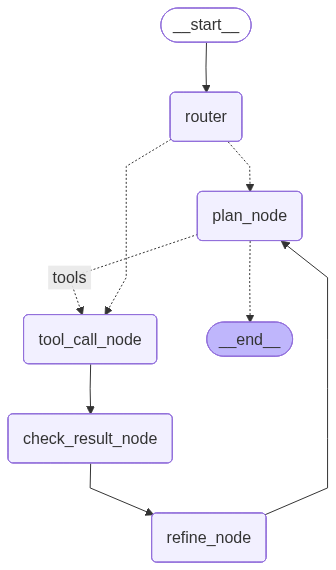

In [17]:
from IPython.display import Image ,display

display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
config={"configurable" :{"thread_id" :"test1"}}
query = "현재 서울 기온을 검색하고, 그 값에 50을 더해줘."

for event in app.stream({"messages": [HumanMessage(content=query)]}, config=config):
    for node_name, _ in event.items():
        print(f"▶️ 실행된 노드: {node_name}")

▶️ 실행된 노드: router
▶️ 실행된 노드: plan_node
▶️ 실행된 노드: tool_call_node

[Check Result]  도구(get_current_weather) 실행 완료.
   ㄴ 결과 확인: 날씨 조회 실패: city not found...
▶️ 실행된 노드: check_result_node
[Refine Node] 결과를 반영하여 다음 단계를 준비
▶️ 실행된 노드: refine_node
▶️ 실행된 노드: plan_node
▶️ 실행된 노드: tool_call_node

[Check Result]  도구(get_current_weather) 실행 완료.
   ㄴ 결과 확인: Seoul의 현재 날씨: 맑음 ,온도:3.76...
▶️ 실행된 노드: check_result_node
[Refine Node] 결과를 반영하여 다음 단계를 준비
▶️ 실행된 노드: refine_node
▶️ 실행된 노드: plan_node
▶️ 실행된 노드: tool_call_node

[Check Result]  도구(calculate) 실행 완료.
   ㄴ 결과 확인: 53.76...
▶️ 실행된 노드: check_result_node
[Refine Node] 결과를 반영하여 다음 단계를 준비
▶️ 실행된 노드: refine_node
▶️ 실행된 노드: plan_node


In [15]:
query = "부산 날씨 알려줘"
config = {"configurable": {"thread_id": "advanced_test_01"}}

print(f"질문: {query}\n" + "="*50)
for event in app.stream({"messages": [HumanMessage(content=query)]}, config=config):
    for node_name, _ in event.items():
        print(f"▶️ 실행된 노드: {node_name}")

질문: 부산 날씨 알려줘
▶️ 실행된 노드: router
▶️ 실행된 노드: tool_call_node

[Check Result]  도구(get_current_weather) 실행 완료.
   ㄴ 결과 확인: 날씨 조회 실패: city not found...
▶️ 실행된 노드: check_result_node
[Refine Node] 결과를 반영하여 다음 단계를 준비
▶️ 실행된 노드: refine_node
▶️ 실행된 노드: plan_node
▶️ 실행된 노드: tool_call_node

[Check Result]  도구(get_current_weather) 실행 완료.
   ㄴ 결과 확인: Busan의 현재 날씨: 구름조금 ,온도:9.99...
▶️ 실행된 노드: check_result_node
[Refine Node] 결과를 반영하여 다음 단계를 준비
▶️ 실행된 노드: refine_node
▶️ 실행된 노드: plan_node


In [33]:
query="최근 AI 뉴스 3개를 찾아서 요약하고, 가장 중요한 것의 상세 정보를 알려줘"
config ={'configurable': {"thread_id" :'test6'}}
print(f"질문: {query}\n" + "="*50)
for event in app.stream({"messages": [HumanMessage(content=query)]}, config=config):
    for node_name, _ in event.items():
        print(f"▶️ 실행된 노드: {node_name}")

질문: 최근 AI 뉴스 3개를 찾아서 요약하고, 가장 중요한 것의 상세 정보를 알려줘
▶️ 실행된 노드: router
▶️ 실행된 노드: plan_node
▶️ 실행된 노드: tool_call_node

[Check Result]  도구(tavily_search_results_json) 실행 완료.
   ㄴ 결과 확인: [{"title": "The Latest AI News and AI Breakthroughs that Matter Most", "url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "content": "Summary: Britain's Channel 4 has launched an AI-ge...
▶️ 실행된 노드: check_result_node
[Refine Node] 도구 실행 완료. LLM에게 다음 행동 가이드를 주입합니다.
▶️ 실행된 노드: refine_node
▶️ 실행된 노드: plan_node
▶️ 실행된 노드: tool_call_node

[Check Result]  도구(tavily_search_results_json) 실행 완료.
   ㄴ 결과 확인: [{"title": "Community | OpenAI Academy | Melissa Milios Davis - LinkedIn", "url": "https://www.linkedin.com/posts/melissa-milios-davis_news-organizations-community-openai-academy-activity-740748599407...
▶️ 실행된 노드: check_result_node
[Refine Node] 도구 실행 완료. LLM에게 다음 행동 가이드를 주입합니다.
▶️ 실행된 노드: refine_node
▶️ 실행된 노드: plan_node


In [34]:
query="최근 AI 뉴스 3개를 찾아서 요약하고, 가장 중요한 것의 상세 정보를 알려줘"
config ={'configurable': {"thread_id" :'test7'}}

for event in app.stream({"messages": [HumanMessage(content=query)]}, config=config):
    for node_name, values in event.items():
        print(f"▶️ 실행된 노드: {node_name}")
        
        # plan_node가 실행되었을 때, 그 결과(메시지)를 확인
        if node_name == "plan_node":
            last_message = values["messages"][-1]
            
            # 도구 호출이 없고, 텍스트 내용(content)이 있다면 그것이 바로 '최종 답변'입니다.
            if isinstance(last_message, AIMessage) and last_message.content and not last_message.tool_calls:
                print("\n" + "="*50)
                print(f"🎉 [최종 답변]\n\n{last_message.content}")
                print("="*50)

▶️ 실행된 노드: router
▶️ 실행된 노드: plan_node
▶️ 실행된 노드: tool_call_node

[Check Result]  도구(tavily_search_results_json) 실행 완료.
   ㄴ 결과 확인: [{"title": "The Latest AI News and AI Breakthroughs that Matter Most: 2025", "url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "content": "Date: December 14, 2025Summary: OpenAI has a...
▶️ 실행된 노드: check_result_node
[Refine Node] 도구 실행 완료. LLM에게 다음 행동 가이드를 주입합니다.
▶️ 실행된 노드: refine_node
▶️ 실행된 노드: plan_node
▶️ 실행된 노드: tool_call_node

[Check Result]  도구(tavily_search_results_json) 실행 완료.
   ㄴ 결과 확인: [{"title": "AI news anchor \"Arti\" on Channel 4: Transparency or manipulation?", "url": "https://www.linkedin.com/posts/harshsongra_do-you-actually-know-whos-behind-your-news-activity-739617740692066...
▶️ 실행된 노드: check_result_node
[Refine Node] 도구 실행 완료. LLM에게 다음 행동 가이드를 주입합니다.
▶️ 실행된 노드: refine_node
▶️ 실행된 노드: plan_node

🎉 [최종 답변]

최근 AI 관련 뉴스 3개를 요약하겠습니다.

1. **OpenAI Academy for News Organizations**:
   - OpenAI는 언론인과 미디어 기관을 위해 AI 통합을 지원하는 